In [1]:
sc.addPyFile('/opt/spark/jars/graphframes-0.8.2-spark3.2-s_2.12.jar')

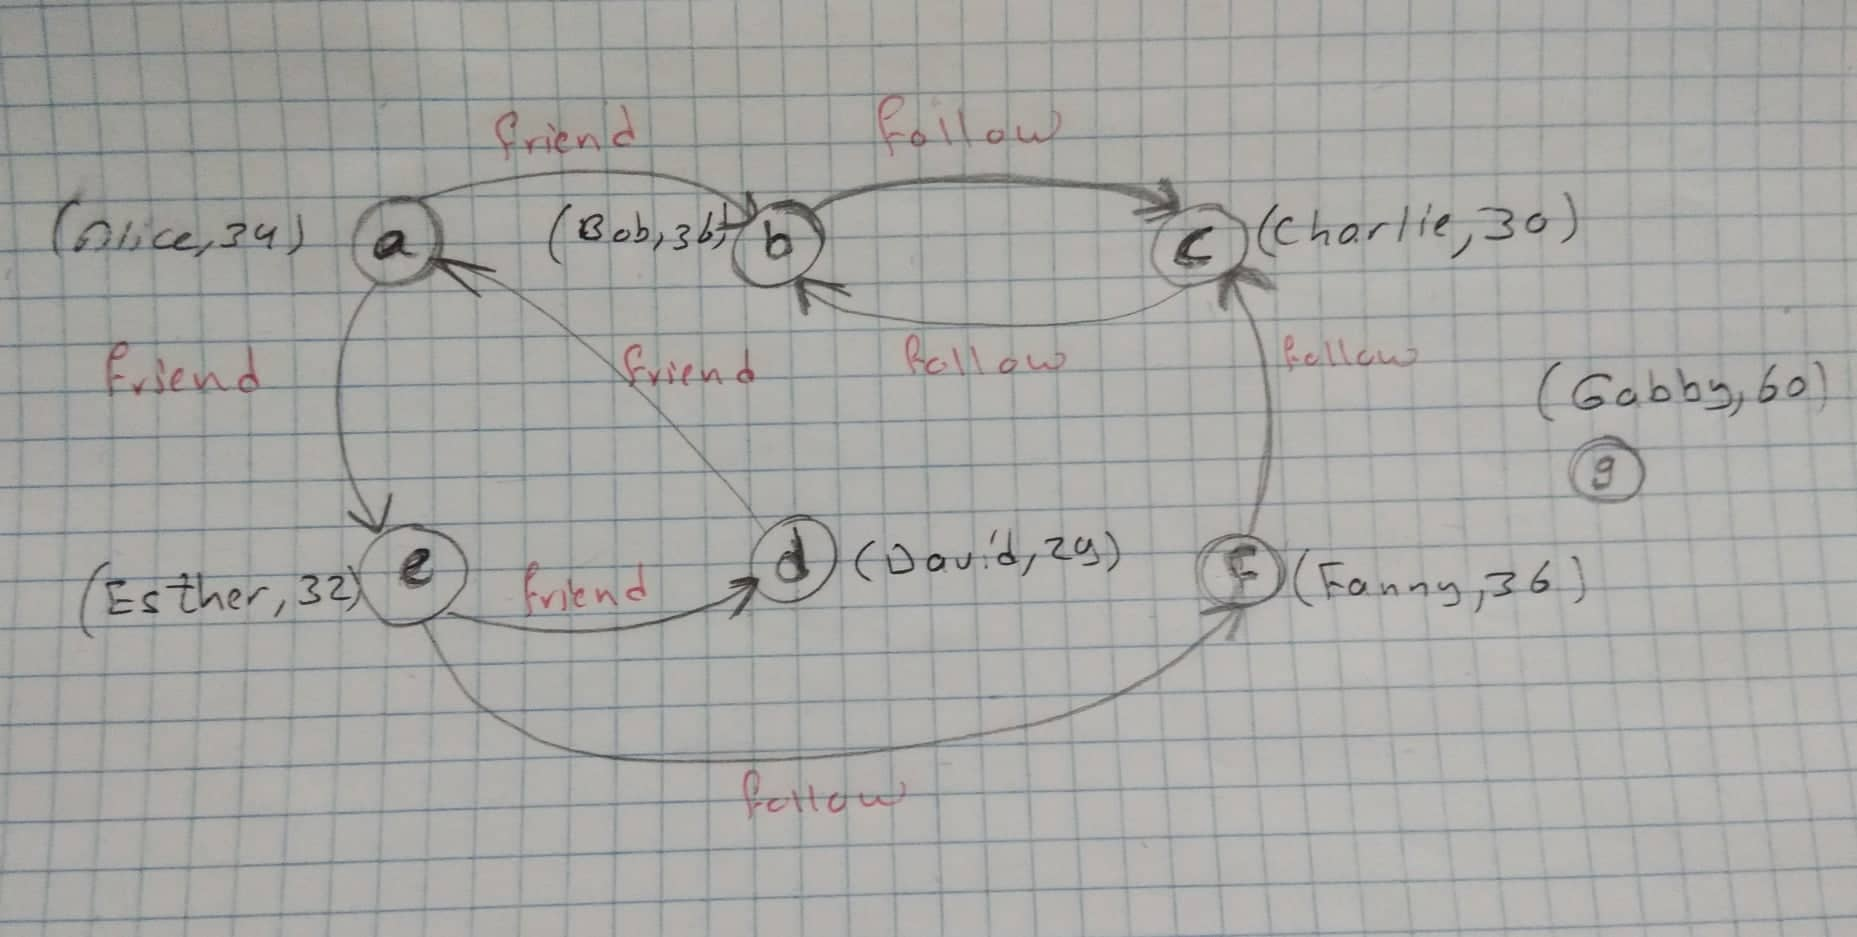

In [2]:
# Vertex DataFrame
v = spark.createDataFrame([
  ("a", "Alice", 34),
  ("b", "Bob", 36),
  ("c", "Charlie", 30),
  ("d", "David", 29),
  ("e", "Esther", 32),
  ("f", "Fanny", 36),
  ("g", "Gabby", 60)
], ["id", "name", "age"])
# Edge DataFrame
e = spark.createDataFrame([
  ("a", "b", "friend"),
  ("b", "c", "follow"),
  ("c", "b", "follow"),
  ("f", "c", "follow"),
  ("e", "f", "follow"),
  ("e", "d", "friend"),
  ("d", "a", "friend"),
  ("a", "e", "friend")
], ["src", "dst", "relationship"])

In [3]:
v.show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  a|  Alice| 34|
|  b|    Bob| 36|
|  c|Charlie| 30|
|  d|  David| 29|
|  e| Esther| 32|
|  f|  Fanny| 36|
|  g|  Gabby| 60|
+---+-------+---+



In [4]:
v.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



In [5]:
e.printSchema()

root
 |-- src: string (nullable = true)
 |-- dst: string (nullable = true)
 |-- relationship: string (nullable = true)



In [6]:
e.show()

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  a|  b|      friend|
|  b|  c|      follow|
|  c|  b|      follow|
|  f|  c|      follow|
|  e|  f|      follow|
|  e|  d|      friend|
|  d|  a|      friend|
|  a|  e|      friend|
+---+---+------------+



In [7]:
from graphframes import *

In [8]:
g = GraphFrame(v,e)

/opt/spark/python/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [9]:
g

GraphFrame(v:[id: string, name: string ... 1 more field], e:[src: string, dst: string ... 1 more field])

In [10]:
g.cache()

GraphFrame(v:[id: string, name: string ... 1 more field], e:[src: string, dst: string ... 1 more field])

In [13]:
dfIn = g.inDegrees
dfOut = g.outDegrees

/opt/spark/python/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [14]:
dfIn.show()
dfOut.show()

+---+--------+
| id|inDegree|
+---+--------+
|  c|       2|
|  b|       2|
|  f|       1|
|  d|       1|
|  e|       1|
|  a|       1|
+---+--------+

+---+---------+
| id|outDegree|
+---+---------+
|  b|        1|
|  a|        2|
|  f|        1|
|  c|        1|
|  e|        2|
|  d|        1|
+---+---------+



In [19]:
g.vertices.show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  a|  Alice| 34|
|  b|    Bob| 36|
|  c|Charlie| 30|
|  d|  David| 29|
|  e| Esther| 32|
|  f|  Fanny| 36|
|  g|  Gabby| 60|
+---+-------+---+



In [17]:
pr = g.pageRank(maxIter=10)

In [20]:
pr.vertices.show()

+---+-------+---+-------------------+
| id|   name|age|           pagerank|
+---+-------+---+-------------------+
|  e| Esther| 32| 0.3613490987992571|
|  a|  Alice| 34| 0.4485115093698443|
|  b|    Bob| 36| 2.7025217677349773|
|  g|  Gabby| 60|0.17073170731707318|
|  d|  David| 29|0.32504910549694244|
|  f|  Fanny| 36|0.32504910549694244|
|  c|Charlie| 30| 2.6667877057849627|
+---+-------+---+-------------------+



In [21]:
pr.edges.show()

+---+---+------------+------+
|src|dst|relationship|weight|
+---+---+------------+------+
|  a|  b|      friend|   0.5|
|  a|  e|      friend|   0.5|
|  b|  c|      follow|   1.0|
|  c|  b|      follow|   1.0|
|  d|  a|      friend|   1.0|
|  e|  d|      friend|   0.5|
|  e|  f|      follow|   0.5|
|  f|  c|      follow|   1.0|
+---+---+------------+------+



In [22]:
m1 = g.find('(vert1)-[ed1]->(v2)')

/opt/spark/python/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [23]:
m1.printSchema()

root
 |-- vert1: struct (nullable = false)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- age: long (nullable = true)
 |-- ed1: struct (nullable = false)
 |    |-- src: string (nullable = true)
 |    |-- dst: string (nullable = true)
 |    |-- relationship: string (nullable = true)
 |-- v2: struct (nullable = false)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- age: long (nullable = true)



In [24]:
m1.show()

+----------------+--------------+----------------+
|           vert1|           ed1|              v2|
+----------------+--------------+----------------+
|  {a, Alice, 34}|{a, b, friend}|    {b, Bob, 36}|
|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|
|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|
| {e, Esther, 32}|{e, f, follow}|  {f, Fanny, 36}|
| {e, Esther, 32}|{e, d, friend}|  {d, David, 29}|
|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|
|  {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|
+----------------+--------------+----------------+



In [25]:
dfm1 = m1.filter('vert1.age<v2.age')

In [26]:
dfm1.show()

+----------------+--------------+--------------+
|           vert1|           ed1|            v2|
+----------------+--------------+--------------+
|  {a, Alice, 34}|{a, b, friend}|  {b, Bob, 36}|
|{c, Charlie, 30}|{c, b, follow}|  {b, Bob, 36}|
| {e, Esther, 32}|{e, f, follow}|{f, Fanny, 36}|
|  {d, David, 29}|{d, a, friend}|{a, Alice, 34}|
+----------------+--------------+--------------+



In [27]:
dfm2= m1.filter('vert1.age<v2.age').filter('ed1.relationship="friend"')

In [28]:
dfm2.show()

+--------------+--------------+--------------+
|         vert1|           ed1|            v2|
+--------------+--------------+--------------+
|{a, Alice, 34}|{a, b, friend}|  {b, Bob, 36}|
|{d, David, 29}|{d, a, friend}|{a, Alice, 34}|
+--------------+--------------+--------------+



In [29]:
m2 = g.find('(v1)-[e1]->(v2);(v2)-[e2]->(v3)')

/opt/spark/python/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [30]:
m2.show()

+----------------+--------------+----------------+--------------+----------------+
|              v1|            e1|              v2|            e2|              v3|
+----------------+--------------+----------------+--------------+----------------+
|  {a, Alice, 34}|{a, b, friend}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|
|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|
|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
| {e, Esther, 32}|{e, f, follow}|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|
| {e, Esther, 32}|{e, d, friend}|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|
|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|
|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|{a, b, friend}|    {b, Bob, 36}|
|  {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|{e, d, friend}|  {d, David, 29}|
|  {

In [31]:
m2 = g.find('(v1)-[e1]->(v2);(v2)-[e2]->(v3)').filter('v1.id !=v3.id')
m2.show()

+---------------+--------------+----------------+--------------+----------------+
|             v1|            e1|              v2|            e2|              v3|
+---------------+--------------+----------------+--------------+----------------+
| {a, Alice, 34}|{a, b, friend}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|
| {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
|{e, Esther, 32}|{e, f, follow}|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|
|{e, Esther, 32}|{e, d, friend}|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|
| {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|
| {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|{a, b, friend}|    {b, Bob, 36}|
| {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|{e, d, friend}|  {d, David, 29}|
| {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|{e, f, follow}|  {f, Fanny, 36}|
+---------------+--------------+----------------+--------------+----------------+



In [32]:
m3 = g.find('(v1)-[e1]->(v2);(v2)-[e2]->(v1)')
m3.show()

+----------------+--------------+----------------+--------------+
|              v1|            e1|              v2|            e2|
+----------------+--------------+----------------+--------------+
|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|
|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|
+----------------+--------------+----------------+--------------+



In [35]:
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [34]:
m4 = g.find('(v1)-[e1]->(v2);(v2)-[e2]->(v3);(v3)-[e3]->(v4)').filter('v1.id !=v4.id')
m4.show()

+----------------+--------------+----------------+--------------+----------------+--------------+----------------+
|              v1|            e1|              v2|            e2|              v3|            e3|              v4|
+----------------+--------------+----------------+--------------+----------------+--------------+----------------+
|  {a, Alice, 34}|{a, b, friend}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|
|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|
| {e, Esther, 32}|{e, f, follow}|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
| {e, Esther, 32}|{e, d, friend}|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34

In [36]:
m5 = g.find('(v1)-[]->(v2);(v2)-[]->(v3);(v3)-[]->(v4)').filter('v1.id !=v4.id')
m5.show()

+----------------+----------------+----------------+----------------+
|              v1|              v2|              v3|              v4|
+----------------+----------------+----------------+----------------+
|  {a, Alice, 34}|    {b, Bob, 36}|{c, Charlie, 30}|    {b, Bob, 36}|
|    {b, Bob, 36}|{c, Charlie, 30}|    {b, Bob, 36}|{c, Charlie, 30}|
|{c, Charlie, 30}|    {b, Bob, 36}|{c, Charlie, 30}|    {b, Bob, 36}|
|  {f, Fanny, 36}|{c, Charlie, 30}|    {b, Bob, 36}|{c, Charlie, 30}|
| {e, Esther, 32}|  {f, Fanny, 36}|{c, Charlie, 30}|    {b, Bob, 36}|
| {e, Esther, 32}|  {d, David, 29}|  {a, Alice, 34}|    {b, Bob, 36}|
|  {d, David, 29}|  {a, Alice, 34}| {e, Esther, 32}|  {f, Fanny, 36}|
|  {d, David, 29}|  {a, Alice, 34}|    {b, Bob, 36}|{c, Charlie, 30}|
|  {a, Alice, 34}| {e, Esther, 32}|  {f, Fanny, 36}|{c, Charlie, 30}|
+----------------+----------------+----------------+----------------+



In [37]:
m6 = g.find('()-[e1]->(v2);(v2)-[e2]->(v3);(v3)-[e3]->()')
m6.show()

+--------------+----------------+--------------+----------------+--------------+
|            e1|              v2|            e2|              v3|            e3|
+--------------+----------------+--------------+----------------+--------------+
|{a, b, friend}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|
|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|
|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|
|{f, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|
|{e, f, follow}|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|{c, b, follow}|
|{e, d, friend}|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|{a, e, friend}|
|{e, d, friend}|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|{a, b, friend}|
|{d, a, friend}|  {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|{e, d, friend}|
|{d, a, friend}|  {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|{e, f, follow}|
|{d, a, friend}|  {a, Alice,

In [38]:
m4 = g.find('(v1)-[e1]->(v2);(v2)-[e2]->(v3);(v3)-[e3]->(v4)').filter('v1.id !=v4.id')
m4.show()

+----------------+--------------+----------------+--------------+----------------+--------------+----------------+
|              v1|            e1|              v2|            e2|              v3|            e3|              v4|
+----------------+--------------+----------------+--------------+----------------+--------------+----------------+
|  {a, Alice, 34}|{a, b, friend}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|
|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|
| {e, Esther, 32}|{e, f, follow}|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
| {e, Esther, 32}|{e, d, friend}|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34

In [39]:
m7 = g.find('(v1)-[e1]->(v2)')
m7.show()

+----------------+--------------+----------------+
|              v1|            e1|              v2|
+----------------+--------------+----------------+
|  {a, Alice, 34}|{a, b, friend}|    {b, Bob, 36}|
|    {b, Bob, 36}|{b, c, follow}|{c, Charlie, 30}|
|{c, Charlie, 30}|{c, b, follow}|    {b, Bob, 36}|
|  {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|
| {e, Esther, 32}|{e, f, follow}|  {f, Fanny, 36}|
| {e, Esther, 32}|{e, d, friend}|  {d, David, 29}|
|  {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|
|  {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|
+----------------+--------------+----------------+



In [41]:
m8 = g.find('(v1)-[e1]->(v2);!(v2)-[]->(v1)')
m8.show()

+---------------+--------------+----------------+
|             v1|            e1|              v2|
+---------------+--------------+----------------+
| {a, Alice, 34}|{a, e, friend}| {e, Esther, 32}|
|{e, Esther, 32}|{e, f, follow}|  {f, Fanny, 36}|
| {a, Alice, 34}|{a, b, friend}|    {b, Bob, 36}|
|{e, Esther, 32}|{e, d, friend}|  {d, David, 29}|
| {f, Fanny, 36}|{f, c, follow}|{c, Charlie, 30}|
| {d, David, 29}|{d, a, friend}|  {a, Alice, 34}|
+---------------+--------------+----------------+



In [42]:
m9 = g.find('(v1)-[e1]->(v2);!(v2)-[e2]->(v1)')
m9.show()

Py4JJavaError: An error occurred while calling o80.find.
: org.graphframes.InvalidParseException: Motif finding does not support negated named edges, but the given pattern contained: !(NamedVertex(v2))-[e2]->(NamedVertex(v1))
	at org.graphframes.pattern.Pattern$.$anonfun$assertValidPatterns$1(patterns.scala:107)
	at org.graphframes.pattern.Pattern$.$anonfun$assertValidPatterns$1$adapted(patterns.scala:102)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.graphframes.pattern.Pattern$.assertValidPatterns(patterns.scala:102)
	at org.graphframes.pattern.Pattern$.parse(patterns.scala:59)
	at org.graphframes.GraphFrame.find(GraphFrame.scala:332)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)
